# 使用simulink设计一个两输入的axilite加法器，并使用hdlcoder 转化为IP
# 使用Pynq 框架进行驱动

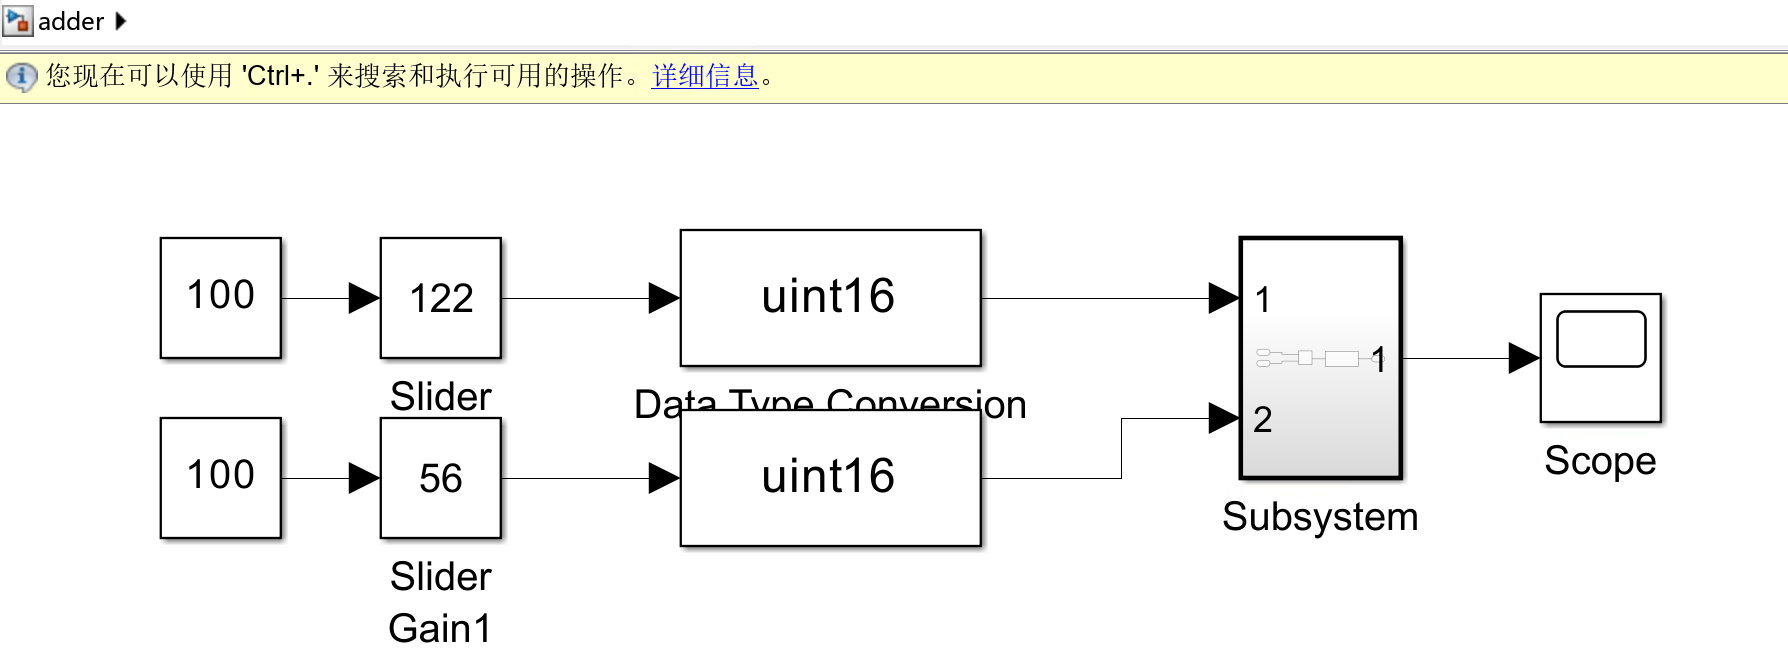

## 生成IP的寄存器
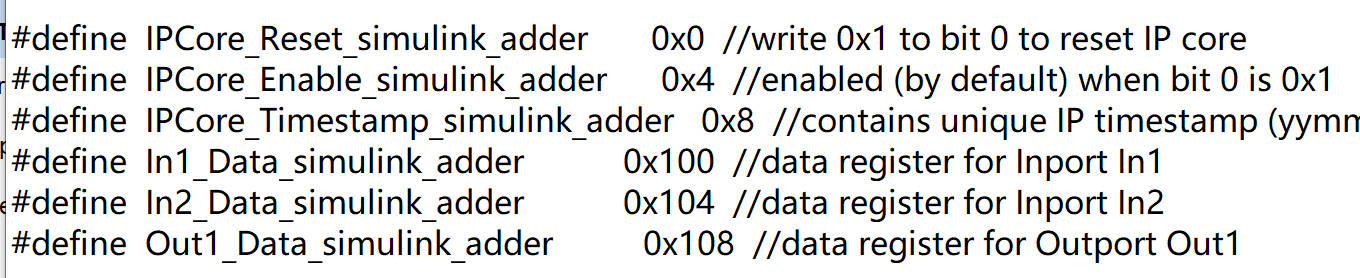

## 注意参考https://discuss.pynq.io/t/overlay-using-matlab-generated-ipcore-register-map-only-available-if-the-hwh-is-provided/2402/16
## 应将subsystem的输入和输出口都设计为uint16

## 如使用ufixdt16_u14.xsa（2输入1输出口都调整为fixdt(0,16,14)）,当输入1.6定点数时，pynq 报错

In [1]:
from pynq import Overlay

In [2]:
ol = Overlay('simulink-axi-adder/adder.bit')

In [3]:
ol.ip_dict

{'simulink_adder_0': {'type': 'xilinx.com:ip:simulink_adder:1.0',
  'mem_id': 'AXI4_Lite',
  'memtype': 'REGISTER',
  'gpio': {},
  'interrupts': {},
  'parameters': {'Component_Name': 'design_1_simulink_adder_0_0',
   'EDK_IPTYPE': 'PERIPHERAL',
   'C_BASEADDR': '0xA0000000',
   'C_HIGHADDR': '0xA000FFFF',
   'DATA_WIDTH': '32',
   'PROTOCOL': 'AXI4LITE',
   'FREQ_HZ': '99999001',
   'ID_WIDTH': '0',
   'ADDR_WIDTH': '16',
   'AWUSER_WIDTH': '0',
   'ARUSER_WIDTH': '0',
   'WUSER_WIDTH': '0',
   'RUSER_WIDTH': '0',
   'BUSER_WIDTH': '0',
   'READ_WRITE_MODE': 'READ_WRITE',
   'HAS_BURST': '0',
   'HAS_LOCK': '0',
   'HAS_PROT': '0',
   'HAS_CACHE': '0',
   'HAS_QOS': '0',
   'HAS_REGION': '0',
   'HAS_WSTRB': '1',
   'HAS_BRESP': '1',
   'HAS_RRESP': '1',
   'SUPPORTS_NARROW_BURST': '0',
   'NUM_READ_OUTSTANDING': '1',
   'NUM_WRITE_OUTSTANDING': '1',
   'MAX_BURST_LENGTH': '1',
   'PHASE': '0.0',
   'CLK_DOMAIN': 'design_1_zynq_ultra_ps_e_0_0_pl_clk0',
   'NUM_READ_THREADS': '4',
   

In [4]:
from pynq import MMIO
adder = MMIO(ol.ip_dict['simulink_adder_0']['phys_addr'], ol.ip_dict['simulink_adder_0']['addr_range'])

In [10]:
adder.write(0x100,1.6)
a = adder.read(0x100)
a

ValueError: Data type must be int or bytes.

In [ ]:
adder.write(0x104,3.2)
b = adder.read(0x104)
b

In [7]:
c = adder.read(0x108)
c

30